In [73]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt

%matplotlib inline

### Device configuration

In [13]:
# device configuration
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

### Hyper parameters

In [3]:
# hyper parameters
num_epochs = 5
num_classes = 10
batch_size = 128
learning_rate = 0.001

### MNIST dataset and loader

In [7]:
# MNIST dataset and loader
train_dataset = torchvision.datasets.MNIST(root='./mnist', download=True, train=True, transform=torchvision.transforms.ToTensor())
test_dataset = torchvision.datasets.MNIST(root='./mnist', download=True, train=False, transform=torchvision.transforms.ToTensor())

train_dataloader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

### Convnet definition

In [70]:
# cnn definition
class ConvNet(nn.Module):
    
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        
        self.layer1 = nn.Sequential(nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, padding=2), 
                                    nn.BatchNorm2d(num_features=16),
                                    nn.ReLU(), 
                                    nn.MaxPool2d(kernel_size=2, stride=2))
        
        self.layer2 = nn.Sequential(nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, padding=2), 
                                    nn.BatchNorm2d(32),
                                    nn.ReLU(), 
                                    nn.MaxPool2d(kernel_size=2, stride=2))
        
        self.fc = nn.Linear(in_features=32 * 7 * 7, out_features=num_classes)
        
        #self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        
        x = self.layer1(x)
        x = self.layer2(x)
        x = x.reshape(x.size(0), -1)
        x = self.fc(x)
        #x = self.softmax(x)
        
        return x

model = ConvNet(num_classes).to(device)

### Loss and optimizer

In [71]:
# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=learning_rate)

### Train the model

In [72]:
# train the model
losses = []
for epoch in range(num_epochs):
    
    print('epoch: ', epoch)
    
    for i, (images, labels) in enumerate(train_dataloader):
        
        images = images.to(device)
        labels = labels.to(device)
        
        # forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # backward pass
        model.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i + 1) % 100 == 0:
            print('    step: {}, loss: {}'.format(i, loss.item()))
        
        losses.append(loss)

epoch:  0
    step: 99, loss: 0.20390348136425018
    step: 199, loss: 0.04369062930345535
    step: 299, loss: 0.06364984065294266
    step: 399, loss: 0.031579986214637756
epoch:  1
    step: 99, loss: 0.0553002692759037
    step: 199, loss: 0.029505819082260132
    step: 299, loss: 0.08480270951986313
    step: 399, loss: 0.037371907383203506
epoch:  2
    step: 99, loss: 0.07276046276092529
    step: 199, loss: 0.021906370297074318
    step: 299, loss: 0.010310869663953781
    step: 399, loss: 0.07806134223937988
epoch:  3
    step: 99, loss: 0.06662589311599731
    step: 199, loss: 0.060177478939294815
    step: 299, loss: 0.026430103927850723
    step: 399, loss: 0.013086262159049511
epoch:  4
    step: 99, loss: 0.006311852019280195
    step: 199, loss: 0.011730405502021313
    step: 299, loss: 0.01115493755787611
    step: 399, loss: 0.009483571164309978


### Train loss curve

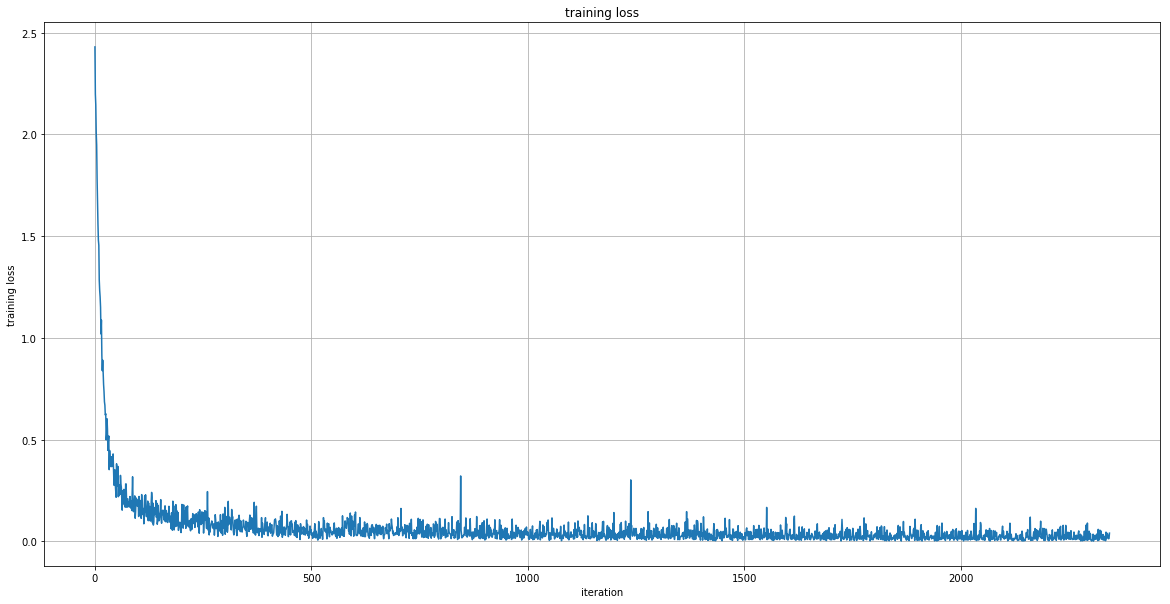

In [77]:
plt.figure(figsize=(20, 10))
plt.plot(losses)

plt.title('training loss')

plt.xlabel('iteration')
plt.ylabel('training loss')

plt.grid(True)

### Test the model

In [39]:
# test the model
model.eval()
with torch.no_grad():
    
    total = 0
    correct = 0
    
    for images, labels in test_dataloader:
        
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        
        _, prediction = torch.max(outputs.data, 1)
        
        total += batch_size
        correct += (prediction == labels).sum().item()
    
    print('test accuracy: {}'.format(correct / total))

test accuracy: 0.9739912974683544
